In [296]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
# отключить предупреждающие сообщения в seaborn
warnings.simplefilter('ignore')
%matplotlib inline
init_notebook_mode(connected=True)  # для работы с plotly в режим оффлайн
cf.go_offline()

df = pd.read_csv('/home/iaan/Documents/SkillFactory/UNIT 2/Files/tips.xls')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
display(len(df))

244

In [23]:
df.loc[df['total_bill'].idxmax()]

total_bill     50.81
tip               10
sex             Male
smoker           Yes
day              Sat
time          Dinner
size               3
Name: 170, dtype: object

In [26]:
%matplotlib inline

<AxesSubplot:>

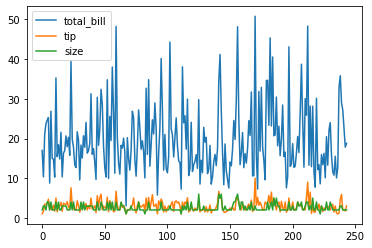

In [27]:
df.plot()

<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>

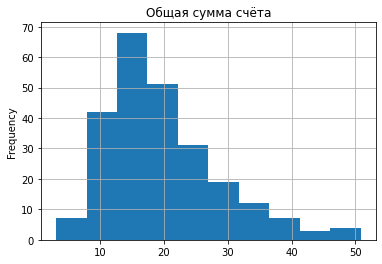

In [32]:
df.total_bill.plot(kind='hist', grid=True, title='Общая сумма счёта')

<AxesSubplot:title={'center':'Распределение по дням'}>

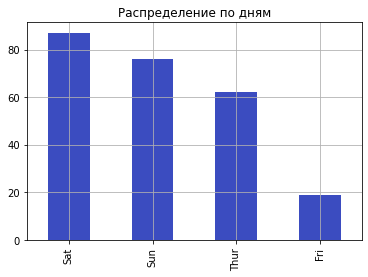

In [37]:
df['day'].value_counts().plot(kind='bar', grid=True,
                              title='Распределение по дням',
                              plcolormap='coolwarm')

<AxesSubplot:xlabel='sex,smoker'>

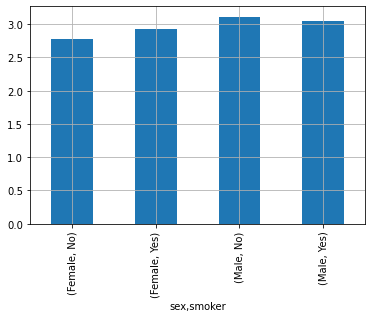

In [39]:
df.groupby(by=['sex', 'smoker'])['tip'].mean().plot(kind='bar', grid=True)

array([<AxesSubplot:title={'center':'Общая сумма счёта'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

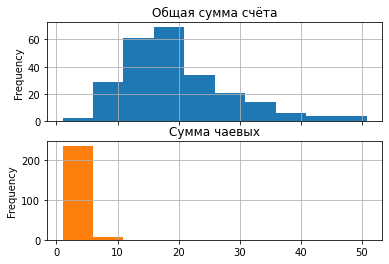

In [40]:
df[['total_bill', 'tip']].plot(kind='hist',
                               grid=True,
                               subplots=True,  # несколько графиков
                               title=['Общая сумма счёта', 'Сумма чаевых'],
                               legend=False)

<AxesSubplot:title={'center':'Общая сумма счёта Vs сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

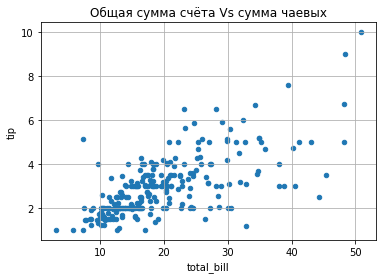

In [224]:
df.plot(kind='scatter',
        x='total_bill',
        y='tip',
        grid=True,
        title='Общая сумма счёта Vs сумма чаевых')

<AxesSubplot:xlabel='day'>

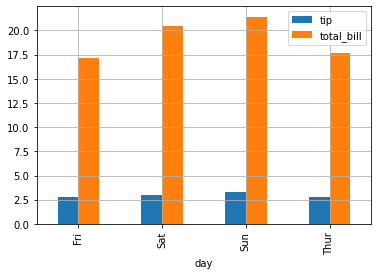

In [47]:
df.pivot_table(values=['total_bill', 'tip'],
               index='day', aggfunc='mean').plot(kind='bar', grid=True)

<AxesSubplot:title={'center':'Распределение клиентов ресторана,\n оставляющих чаевые, по полу и отношению к курению'}, xlabel='sex,smoker'>

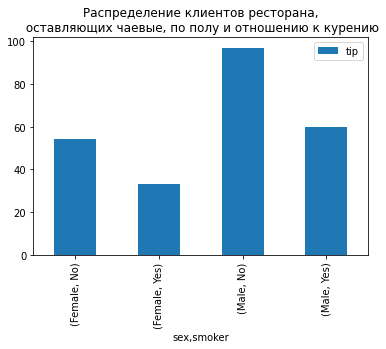

In [225]:
df.pivot_table(values='tip',
               index=['sex', 'smoker'],
               aggfunc='count').plot(kind='bar',
                                     title='Распределение клиентов ресторана,\n оставляющих чаевые, по полу и отношению к курению')

<AxesSubplot:ylabel='smoker'>

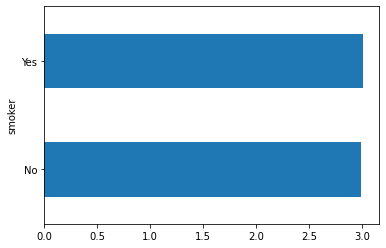

In [53]:
df.groupby('smoker')['tip'].mean().plot(kind='barh')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <BarContainer object of 10 artists>)

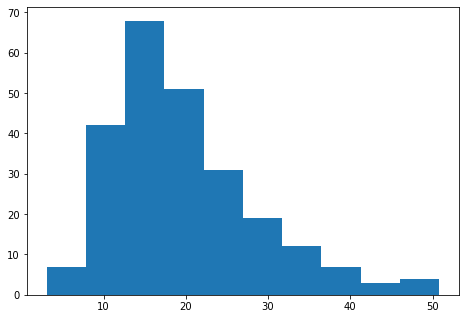

In [74]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

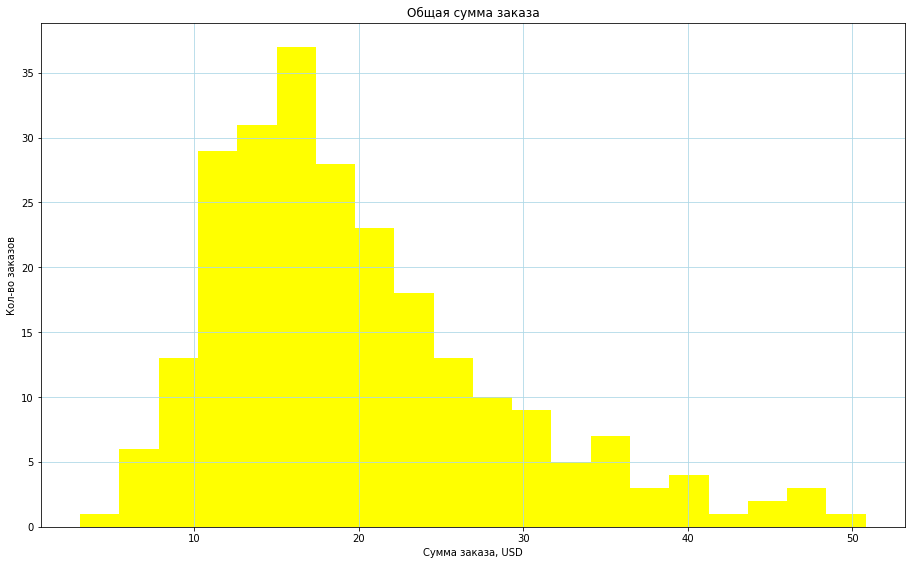

In [231]:
fig = plt.figure(figsize=(12, 7))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df.total_bill, bins=20, color='yellow')
axes.set_title('Общая сумма заказа')
axes.set_xlabel('Сумма заказа, USD')
axes.set_ylabel('Кол-во заказов')
axes.grid(color='lightblue')

Text(0, 0.5, 'Размер чаевых')

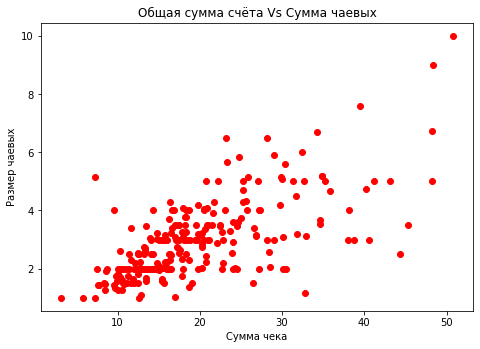

In [87]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df['total_bill'], y=df['tip'], marker='o', color='red')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

(0.0, 66.0)

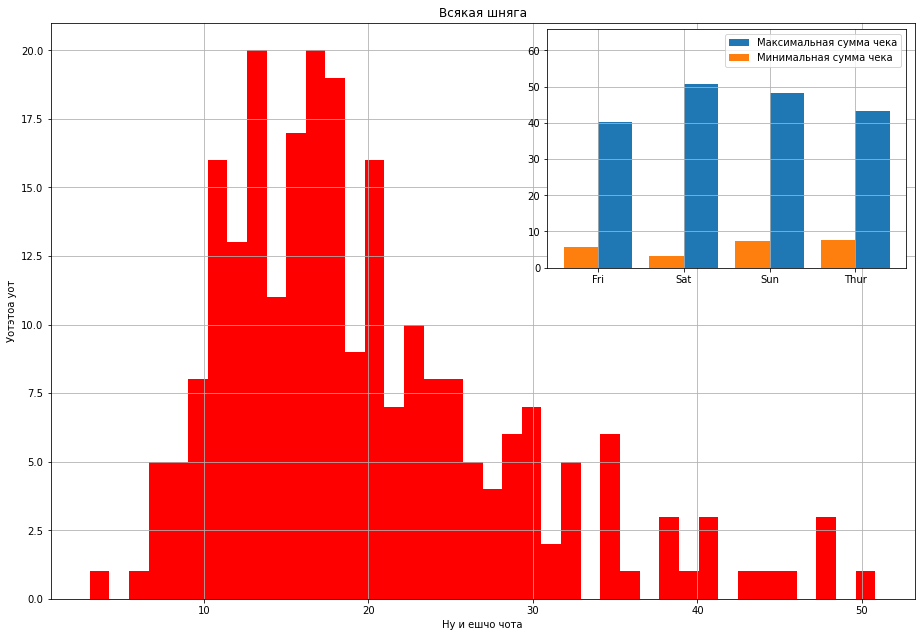

In [147]:
bills_per_day = df.groupby(['day'])['total_bill'].agg([
    'min', 'max']).reset_index()

fig = plt.figure()
main_axes = fig.add_axes([0, 0, 2, 2])
main_axes.hist(df['total_bill'], bins=40, color='red')
main_axes.set_title('Всякая шняга')
main_axes.set_ylabel('Уотэтоа уот')
main_axes.set_xlabel('Ну и ешчо чота')
main_axes.grid()

insert_axes = fig.add_axes([1.15, 1.15, 0.83, 0.83])
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['max'],
                width=0.4, align='edge', label='Максимальная сумма чека')
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['min'],
                width=-0.4, align='edge', label='Минимальная сумма чека')
# 1 - правый верхний угол, 2-3-4 дальше против часовой
insert_axes.legend(loc=1)
insert_axes.grid()
insert_axes.set_ylim(0, 66)  # set_ylim - добавляем ещё высоты,
# чтобы легенда не перекрывала хистограмму

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

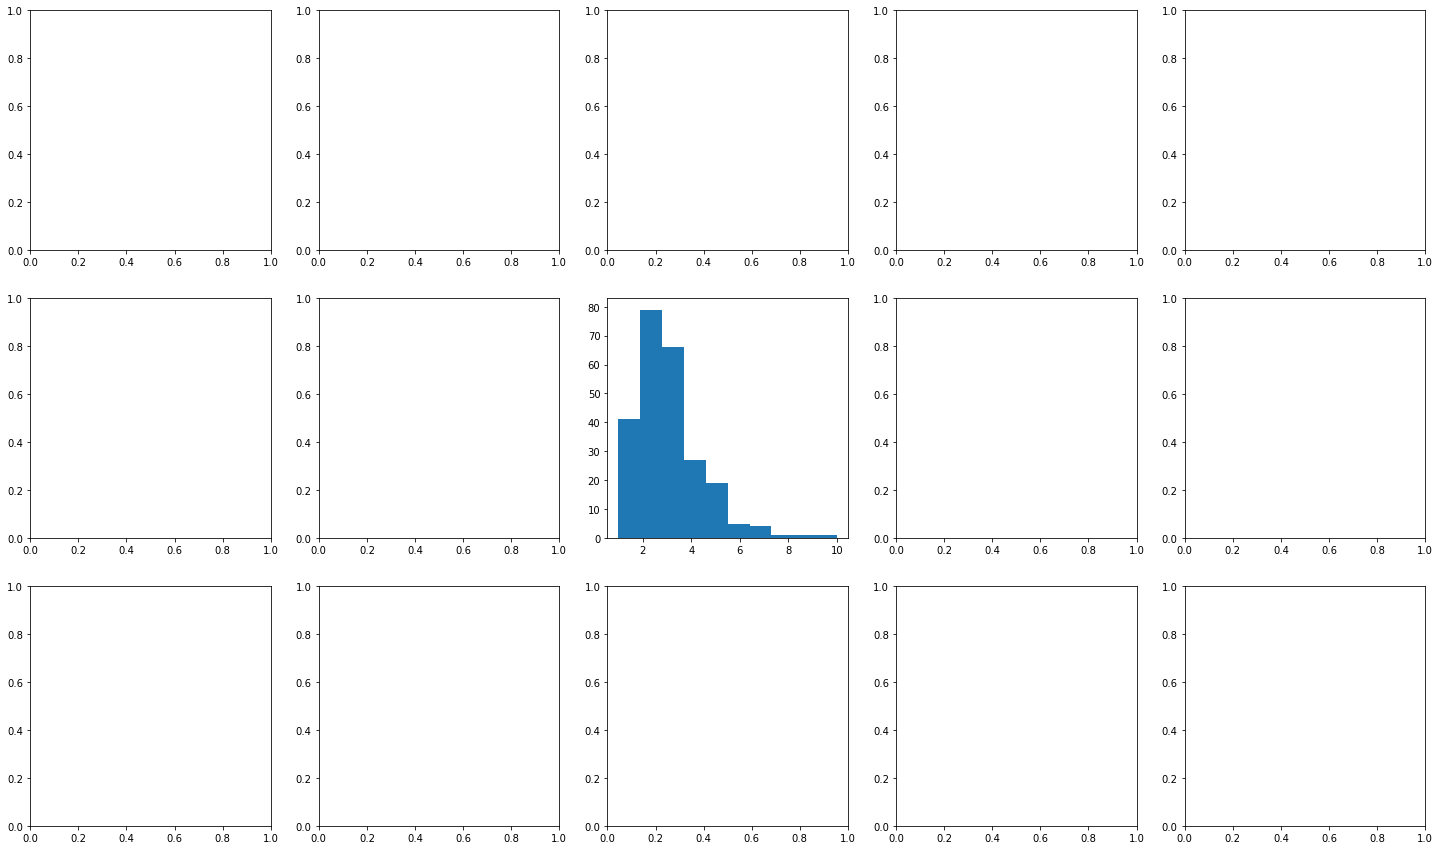

In [233]:
fig, axes = plt.subplots(3, 5, figsize=(25, 15))
axes[1][2].hist(df.tip)

Text(0.5, 1.0, 'Счёт и чаевые')

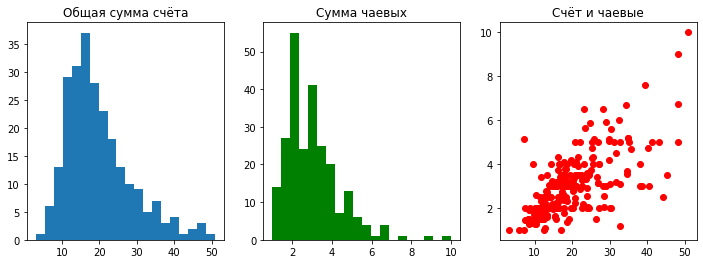

In [167]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].hist(df['total_bill'], bins=20)
axes[0].set_title('Общая сумма счёта')

axes[1].hist(df['tip'], bins=20, color='green')
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='o', color='red')
axes[2].set_title('Счёт и чаевые')

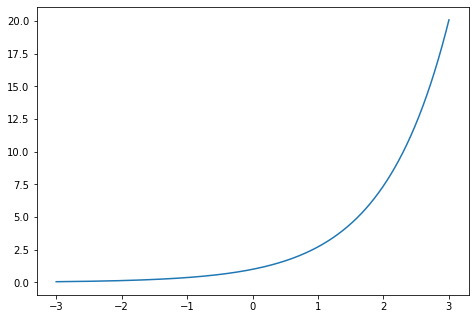

In [190]:
x = np.linspace(start=-3, stop=3, num=1000)
y1 = np.exp(x)
fig = plt.figure()
axs = fig.add_axes([0, 0, 1, 1])
axs.plot(x, y1)

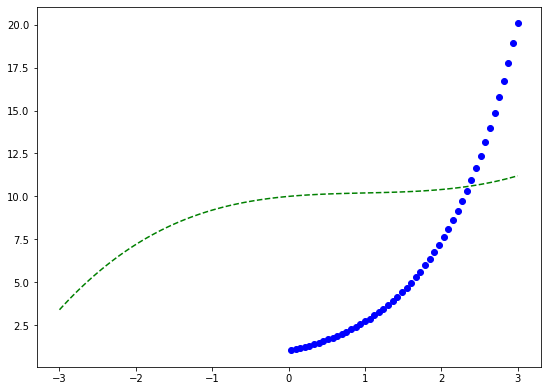

In [221]:
x = np.linspace(start=-3, stop=3, num=100)
y1 = np.exp(x)
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure(figsize=(7, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[50:], y1[50:], 'bo')  # blue dots
axes.plot(x, y2, 'g--')  # green -- can be : .- > < ^ v d D etc

/home/iaan/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

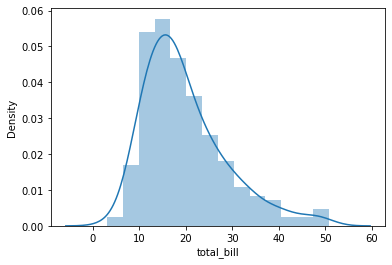

In [238]:
sns.distplot(df.total_bill)

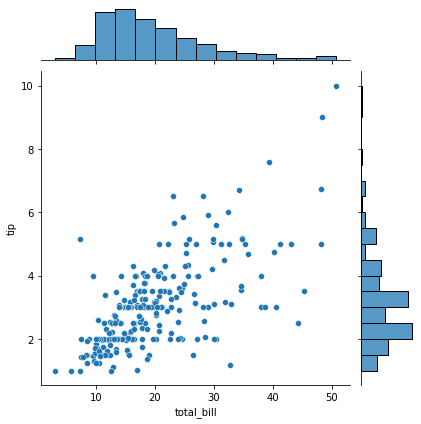

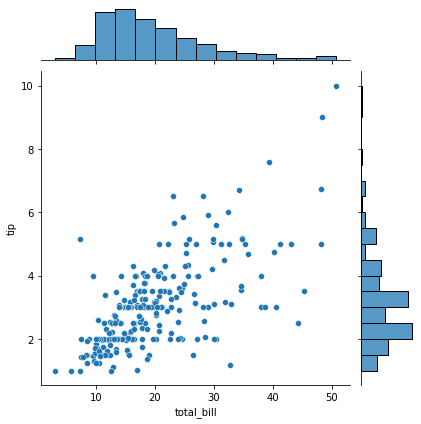

In [240]:
sns.jointplot(x=df['total_bill'], y=df['tip'])
# либо вот так:
sns.jointplot(data=df, x='total_bill', y='tip')

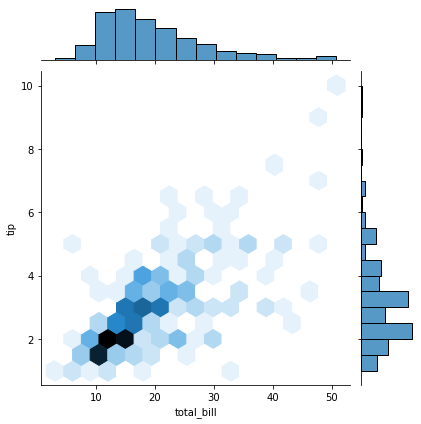

In [246]:
sns.jointplot(x=df['total_bill'], y=df['tip'], kind='hex')

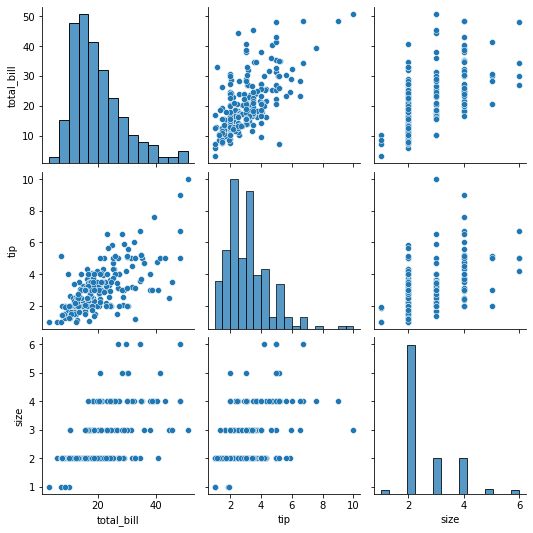

In [244]:
sns.pairplot(df)

<AxesSubplot:xlabel='day', ylabel='count'>

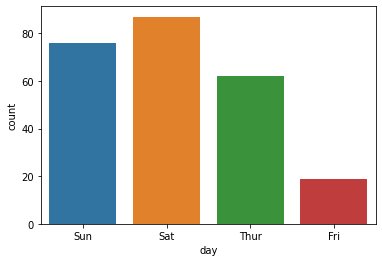

In [247]:
sns.countplot(x=df['day'])

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

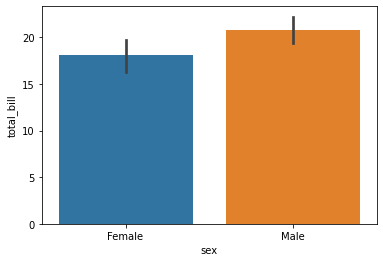

In [283]:
sns.barplot(data=df, x='sex', y='total_bill')

<AxesSubplot:xlabel='day', ylabel='tip'>

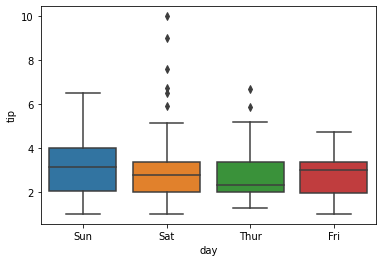

In [287]:
sns.boxplot(x='day', y='tip', data=df)

<AxesSubplot:xlabel='day', ylabel='tip'>

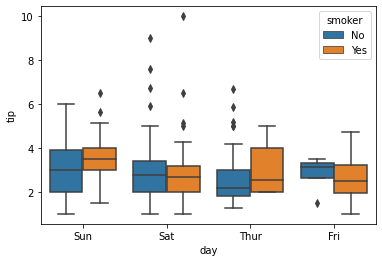

In [288]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

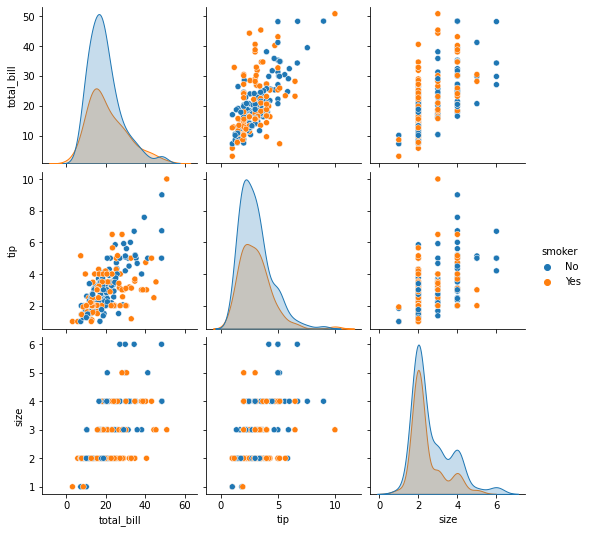

In [289]:
sns.pairplot(df, hue='smoker')

<AxesSubplot:>

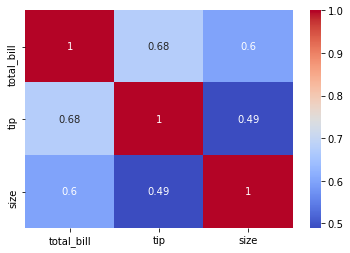

In [293]:
correlation = df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [297]:
df.iplot()

In [299]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [300]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')

<AxesSubplot:xlabel='day'>

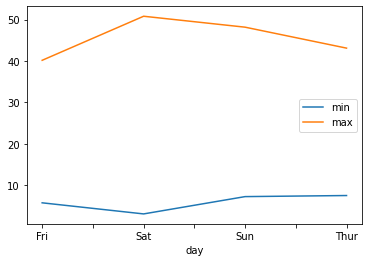

In [301]:
df.groupby(by='day')['total_bill'].agg(['min', 'max']).plot()